<a href="https://colab.research.google.com/github/robcovino/IntroBiomolecularSimulations/blob/main/BolztmannDistribution_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
from numpy import exp
import warnings
warnings.filterwarnings('ignore')

# Set the Boltzmann constant in Kcal/(mol*K)
#In Kcal/mol
#kT=RT/N_a
#R=k*N_a (Kcal/(mol*K)
kb=0.001985875

Credit: Initial part adapted from https://colab.research.google.com/github/paulrobustelli/python_demos/blob/main/Boltzmann_Demo_Student.ipynb#scrollTo=W2W_k3idp5cB by Paul Robustelli.

We are going to examine some preoperties of the Boltzmann Distribution.  We are going to explore how temperature, energy level spacing, and degenercy affect the populations of molecular energy levels.

To review, the ratio of the populations between two molecular energy levels is governed by the **Boltzmann Population Ratio**. where $N_i$
is the population of configuration i, $N_j$ is the popuulation of configuration j, ${\epsilon}_i$ is the energy of configuration i and ${\epsilon}_j$ is the energy of configuration j. Remember that $N_i ∝ P_i$, where $P_i$ is the probability of configuration i.


$\LARGE \frac{N_i}{N_j} =\frac{e^{-\beta\epsilon_i}}{e^{-\beta\epsilon_j}}=e^{-\beta(\epsilon_j-\epsilon_i)}$ 

$\LARGE \beta=\frac{1}{kT}$

Q: write a function that takes as input the energies $ϵ_j$ and $ϵ_i$ and the temperature $T$ and returns the populations of $N_i$ and $N_j$.

Q: write another function that plots the results.

Tip: use 

```
plt.bar(i,p_i)
plt.xlabel("Config",size=20)
plt.ylabel("Population",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
```



In [2]:
def populations_boltzmann( energies, T):
  #unnormalized populations
  populations = np.exp(- energies / (kb * T))
  z = np.sum(populations)
  return populations / z 

In [3]:
populations_boltzmann(energies=np.array([5, 6]), T=300)

array([0.84270862, 0.15729138])

Q: First we will consider two energy levels, can you find an energy level spacing (in Kcal/mol) where the upper energy is population to ~10% of the lower energy level?  ~50% of the lower energy level?


In [4]:
populations_boltzmann(energies=np.array([5, 5.5957625]), T=300)

array([0.73105858, 0.26894142])

In [5]:
populations_boltzmann(energies=np.array([5, 5.5]), T=300)

array([0.69830947, 0.30169053])

Q: How much is a $k_B T$ in these units? 

In [6]:
0.001985875 * 300

0.5957625

Q: How do the populations change by keeping the same energy levels but raising temperature to T=700 K?

In [7]:
populations_boltzmann(energies=np.array([5, 5.5]), T=700)

array([0.58896372, 0.41103628])

Q: What is the general effect of temperature on the populations given an energy gap?

Generalize the function that you wrote to calculate Boltzmann distributed populations to N configurations with different energies. 

Q: calculate the distribution of populations for a linear ladder of energies.

In [8]:
p = populations_boltzmann(energies=np.linspace(5, 8, 10), T=300)
print(p)

[0.43010764 0.24580252 0.14047385 0.0802795  0.04587899 0.02621941
 0.01498415 0.0085633  0.00489385 0.00279679]


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

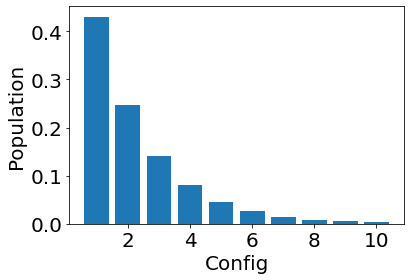

In [9]:
plt.bar(range(1, len(p) + 1),p)
plt.xlabel("Config",size=20)
plt.ylabel("Population",size=20)
plt.xticks(size=20)
plt.yticks(size=20)

Now we treat configurations as a continous variable $x$ described by a continous Boltzmann probability distribution $p(x)$.

Consider the following potential energy function 

$V(x) = \frac{10}{\beta}(x-5)^2$ 

Q: What does it mean to write this energy function with a inverse beta constant?

Q: Can you plot the function on paper without the computer? How is a function like that known in geometry?

Q: Now write a python function that evaluates the energy, and plot it. In what range should we plot it and why can you be sure about that? Does the computer generated plot correspond to your manual one?

In [10]:
def harmonic(x, beta=1):
    return 10 / beta * (x - 5)**2

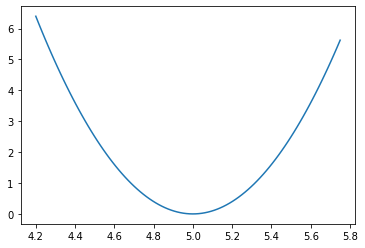

In [11]:
x = np.linspace(4.2,5.75,100)
vx = harmonic(x)
plt.plot(x, vx)

Q: What is the corresponding equilibrium (unnormalized) Boltzmann distribution? Again, write it down analytically, try to plot it without the computer, then write a python function that evaluates and plots it.

In [12]:
def Boltzmann(vx, beta=1):
  return np.exp(-beta * vx)

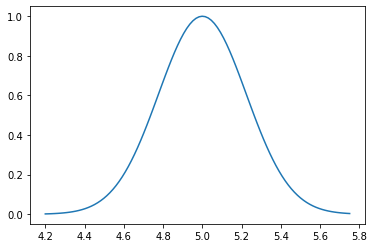

In [13]:
px = Boltzmann(vx)
plt.plot(x, px)

A: Calculate the partition function $Z(\beta)$ (the normalization constant of Boltzmann distribution). Remember that you can use the formula for a Gaussian integral 

$\int dx e^{-a(x+b)^2}=(\frac{\pi}{a})^{1/2}$

You can check that your calculation is correct by numerically calculating the same integral with python completing the code below.

In [14]:
from scipy.integrate import quad

def integrand(x):
  return np.exp( - 10  * (x - 5) ** 2 )

I = quad(integrand, -np.inf, np.inf)

Now let's consider a more complex example. Suppose we want to study a system in the canonical ensemble, characterized
  by the energy function:
  $V\left(x\right)=\frac{1}{\beta}\left(x^{4}+\frac{9}{2}x^{3}+x^{2}-7x+\frac{21}{2}\right)$

  where $\beta=(k_{B}T)^{-1}$.

Q: Use python to plot it. 
- What is the main feature of the function? Can you identify some ``states''?
- Try to guess using your intuition where the system will be most probably be found. 
- Can you sketch the possible probability distribution at equilibrium?

In [15]:
def V_2(x, beta):
  return 1./beta * (x**4 + 9/2 * x**3 + x**2 -7*x + 21/2)

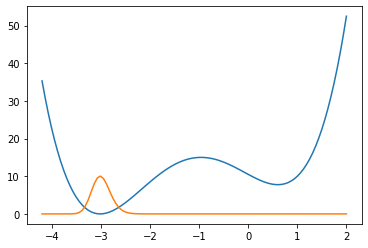

In [16]:
x = np.linspace(-4.2,2,100)
vx = V_2(x, beta=1)

plt.plot(x, vx)
plt.plot(x, 10*Boltzmann(vx))

Q: You should be able to get the analytic expression for the probability distribution at equilibrium (in the canonical ensemble), but you will not be as easily able to plot it. However, this should not be necessary. Use the harmonic approximation to study the PDF at equilibrium of the system. Try to quantify how good the harmonic approximation is.

$V' = 1/\beta (4x^3 + 3/2x^2 + 2x + -7)$

Q: If you are able to distinguish between states, use the harmonic approximation developed at the previous point to calculate the probability for the system to be in each of them. Where will the system mostly be found? Does this confirm your first intuitive sketch? If not, what did you miss?
Now you can numerically evaluate the Bolztmann distribution at equilibrium using the computer. How good was your harmonic approximation calculation? Does the overall picture change?

Q: Reload the time series of the first notebook and estimate the potential energy function that originated it.